# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Let us welcome SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [23]:
temp.loc[temp["State"]== "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
temp["Temperature"].mean()

15.15873015873016

#### We want to know cities and states with Temperature above 15 degress Celcius

In [31]:
# your answer here
b = temp.loc[temp["Temperature"]> 15]
b

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [34]:
b["City"]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [42]:
# your answer here
c = temp.loc[(temp["Temperature"]>= 15) & (temp["Temperature"]<= 20)]
c["City"]

0         NYC
3    Hartford
6      Newark
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [44]:
# your answer here
d = temp.groupby('State').mean()
d

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [46]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [47]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:xlabel='Years', ylabel='Count'>

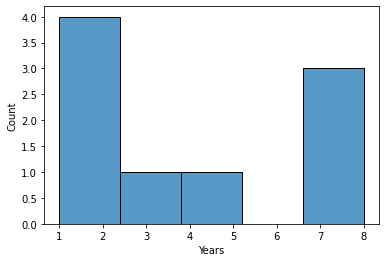

In [106]:
sns.histplot(data=employee, x = "Years")

<AxesSubplot:xlabel='Salary', ylabel='Count'>

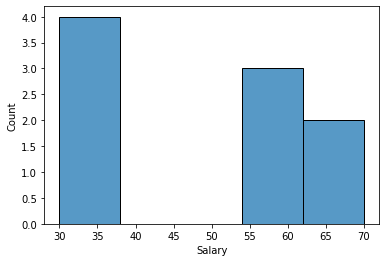

In [107]:
sns.histplot(data=employee, x = "Salary")

#### What's the average salary in this company?

In [49]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [50]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [57]:
employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [61]:
a = employee.groupby('Title').mean('Salary')
a

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Could you give all the information about an employee called David?

In [63]:
# your answer here
employee.iloc[2]

Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object

#### Could you give only David's salary?

In [64]:
# your answer here
employee.iloc[2]["Salary"]

30

#### Print all the rows where job title is associate

In [68]:
employee[employee["Title"]== "associate"]


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [70]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [72]:
# your answer here
employee.loc[(employee["Title"]== "associate") & (employee["Salary"]>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [77]:
# your answer here
employee.groupby("Years").mean("Salary")

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [76]:
# your answer here
employee.groupby("Title").mean("Salary")


,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

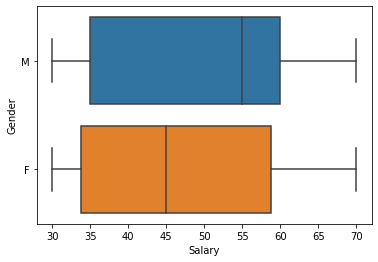

In [88]:
# draw boxplot here
sns.boxplot(data= employee ,x = "Salary", y = "Gender", )

In [114]:
# print first quartile here
a = employee.quantile(0.1)
a

Years      1.8
Salary    30.0
Name: 0.1, dtype: float64

In [115]:
b = employee.quantile(0.3)
b


Years      2.0
Salary    35.0
Name: 0.3, dtype: float64

#### Is the mean salary per gender different?

In [123]:
employee.groupby("Gender").mean("Salary")

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [89]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [98]:
employee.groupby("Department").Salary.agg(["min" , "max"])

,min,max
Department,,
HR,30,70
IT,30,70
Sales,55,55


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [120]:
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [121]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [124]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [125]:
# your answer here
orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [126]:
# your answer here
orders.amount_spent.max()

168469.6

In [127]:
# your answer here
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [136]:
# your answer here

a = orders[orders["Country"]== "Spain"]
a.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [140]:
# your answer here
a["Country"].value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [142]:
# your answer here
orders[orders["amount_spent"]>50].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
26,26,536370,22728,2010,12,3,8,alarm clock bakelike pink,24,2010-12-01 08:45:00,3.75,12583,France,90.00
27,27,536370,22727,2010,12,3,8,alarm clock bakelike red,24,2010-12-01 08:45:00,3.75,12583,France,90.00
33,33,536370,21035,2010,12,3,8,set/2 red retrospot tea towels,18,2010-12-01 08:45:00,2.95,12583,France,53.10
34,34,536370,22326,2010,12,3,8,round snack boxes set of4 woodland,24,2010-12-01 08:45:00,2.95,12583,France,70.80


#### Select orders from Spain that are above 50 items

In [145]:
# your answer here
orders[(orders["amount_spent"]>50) & (orders["Country"]== "Spain")].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [148]:
# your answer here

orders[orders["amount_spent"] == 0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [156]:
# your answer here
a = orders["Description"].isin(["lunch bag"])
orders[a]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='amount_spent', ylabel='Count'>

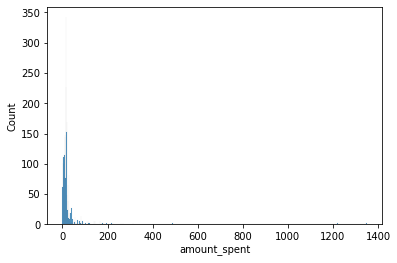

In [159]:
# your answer here
b = orders[orders["Country"]== "Spain"]
b
sns.histplot(data= b, x= "amount_spent")

#### Select all orders made in the month of August

In [164]:
# your answer here
c = orders[orders["month"].isin([8])]
c.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [167]:
# your answer here
c["month"].value_counts()

8    27013
Name: month, dtype: int64

#### What's the  average amount of money spent by country

In [170]:
# your answer here
orders.groupby("Country").mean("amount_spent").head()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,
Australia,224857.287764,556217.951055,2010.972996,6.062447,3.354430,11.398312,71.062447,3.048523,12454.454008,116.895620
Austria,297239.085427,562367.633166,2010.979899,7.623116,2.778894,12.170854,12.263819,4.256030,12519.097990,25.624824
Bahrain,184964.000000,552790.411765,2011.000000,5.000000,1.705882,13.941176,15.294118,4.644118,12354.529412,32.258824
Belgium,276657.968981,560543.014279,2010.953225,7.404727,3.671098,12.225997,11.441162,3.630158,12430.675037,20.283772
Brazil,157314.500000,550201.000000,2011.000000,4.000000,5.000000,10.000000,11.125000,4.456250,12769.000000,35.737500


#### What's the most expensive item?

In [191]:
orders.groupby("UnitPrice").max()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,CustomerID,Country,amount_spent
UnitPrice,,,,,,,,,,,,,
0.000,502122,578841,PADS,2011,12,7,19,set of 9 black skull balloons,12540,2011-11-25 15:57:00,18059,United Kingdom,0.000
0.001,361741,568375,PADS,2011,9,7,17,pads to match all cushions,1,2011-09-26 17:01:00,16198,United Kingdom,0.001
0.040,525404,580619,16045,2011,12,7,20,popart wooden pencils asst,900,2011-12-05 12:08:00,18033,United Kingdom,36.000
0.060,533981,581125,M,2011,12,7,19,manual,3186,2011-12-07 12:41:00,18117,United Kingdom,191.160
0.070,371176,569214,17038,2011,12,7,19,porcelain budah incense holder,1200,2011-10-02 12:22:00,15061,United Kingdom,84.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500.000,297438,562946,M,2011,8,4,9,manual,1,2011-08-11 09:38:00,15581,United Kingdom,2500.000
3155.950,374542,569382,M,2011,10,1,16,manual,1,2011-10-03 16:44:00,15502,United Kingdom,3155.950
3949.320,406406,571751,M,2011,10,3,11,manual,1,2011-10-19 11:18:00,12744,Singapore,3949.320


#### What was the average amount spent per year ?

In [187]:
# your answer here
orders.groupby("year").mean("amount_spent")

,Unnamed: 0,InvoiceNo,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
year,,,,,,,,,
2010,19884.040482,538009.305122,12.000000,3.745528,12.897630,11.937309,3.132095,15529.088417,21.892733
2011,296660.861310,562207.976246,7.303803,3.605338,12.716328,13.098138,3.115054,15277.794830,22.430074
